In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
!pip install PyPDF2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 4.7 MB/s eta 0:00:00


In [4]:
!pip install -q pdfplumber

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.0/42.0 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.5/48.5 kB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 54.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 54.0 MB/s eta 0:00:00


In [5]:
!apt-get install poppler-utils

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 186 kB of archives.
After this operation, 696 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 poppler-utils amd64 22.02.0-2ubuntu0.5 [186 kB]
Fetched 186 kB in 1s (269 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 123614 files and directories currently installed.)
Preparing to unpack .../poppler-utils_22.02.0-2ubuntu0.5_amd64.deb ...
Unpacking poppler-utils (22.02.0-2ubuntu0.5) ...
Setting up poppler-utils (22.02.0-2ubuntu0.5) ...
Processing triggers for man-db (2.10.2-1) ...


In [6]:
import pdfplumber
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
pip install tika

  Preparing metadata (setup.py) ... done
  Created wheel for tika: filename=tika-2.6.0-py3-none-any.whl size=32623 sha256=75edfacb92fde3d0215e8b679256e3395de49d688c230d832c7b4855709c1773
  Stored in directory: /root/.cache/pip/wheels/5f/71/c7/b757709531121b1700cffda5b6b0d4aad095fb507ec84316d0
Successfully built tika


In [8]:
import os
import textwrap
import torch
import numpy as np
import pandas as pd
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
import tika
from tika import parser
import re, string, unicodedata
import inflect
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re, math
from collections import Counter
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
import PyPDF2
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [9]:
resume_zip = '/content/drive/MyDrive/Final_Resumes.zip'
recoms_zip = '/content/drive/MyDrive/Final_Recommendation_Letters (1).zip'

In [10]:
import zipfile
with zipfile.ZipFile(resume_zip, 'r') as zip_ref:
    zip_ref.extractall('resumes')
with zipfile.ZipFile(recoms_zip, 'r') as zip_ref:
    zip_ref.extractall('recoms')

In [11]:
import networkx as nx
import matplotlib.pyplot as plt
recommendations = pd.read_csv('/content/drive/MyDrive/Final_Persons_And_Recommenders.csv')
recommendations_tuple = tuple(zip(recommendations['ID'], recommendations['Recommenders ID']))
recommendations_tuple = list(recommendations_tuple)
recommendation = []
for item in recommendations_tuple:
  num1, list_str = item
  list_nums = [int(x) for x in list_str[1:-1].split(', ')]
  for num2 in list_nums:
    recommendation.append((num1, num2))
recommendation

[(0, 218),
 (0, 391),
 (1, 412),
 (1, 869),
 (1, 233),
 (1, 289),
 (2, 582),
 (2, 624),
 (2, 592),
 (2, 662),
 (2, 469),
 (3, 194),
 (3, 122),
 (4, 763),
 (4, 726),
 (4, 589),
 (4, 977),
 (4, 950),
 (4, 543),
 (4, 30),
 (5, 938),
 (5, 338),
 (5, 417),
 (5, 932),
 (5, 16),
 (6, 232),
 (6, 390),
 (7, 149),
 (7, 366),
 (7, 376),
 (8, 171),
 (8, 687),
 (8, 159),
 (9, 102),
 (9, 851),
 (9, 123),
 (9, 794),
 (9, 684),
 (10, 962),
 (10, 955),
 (10, 481),
 (11, 586),
 (11, 970),
 (12, 10),
 (12, 202),
 (13, 786),
 (13, 987),
 (14, 837),
 (15, 748),
 (15, 511),
 (15, 993),
 (15, 963),
 (15, 445),
 (15, 751),
 (16, 277),
 (16, 565),
 (17, 475),
 (17, 614),
 (17, 404),
 (17, 506),
 (18, 328),
 (18, 750),
 (18, 306),
 (19, 278),
 (19, 671),
 (20, 772),
 (20, 943),
 (21, 459),
 (22, 570),
 (22, 390),
 (22, 211),
 (23, 575),
 (23, 332),
 (23, 456),
 (24, 292),
 (24, 839),
 (24, 377),
 (25, 165),
 (26, 60),
 (27, 138),
 (27, 332),
 (27, 684),
 (28, 213),
 (28, 296),
 (28, 329),
 (28, 72),
 (29, 951),

In [12]:
recommendations['Recommenders ID'] = recommendations['Recommenders ID'].apply(lambda x: [int(y) for y in x[1:-1].split(', ')])

In [13]:
recommendations['no_of_recommenders'] = recommendations['Recommenders ID'].apply(lambda x: len(x))

In [14]:
recommendations.sort_values(by='no_of_recommenders', ascending=False)

ID                                    Recommenders ID  \
772  797  [580, 909, 820, 629, 127, 782, 214, 862, 589, ...   
313  322  [496, 487, 431, 771, 33, 726, 54, 572, 463, 65...   
170  174   [577, 998, 198, 24, 389, 513, 98, 445, 300, 753]   
352  361      [921, 896, 398, 133, 865, 295, 813, 141, 501]   
835  862      [387, 763, 430, 710, 850, 589, 113, 802, 749]   
..   ...                                                ...   
401  411                                              [212]   
314  323                                              [618]   
121  123                                              [706]   
214  221                                              [373]   
390  400                                              [979]   

     no_of_recommenders  
772                  14  
313                  13  
170                  10  
352                   9  
835                   9  
..                  ...  
401                   1  
314                   1  
121                   1  
214                   1  
390                   1  

[964 rows x 3 columns]

In [15]:
for i in range(1000):
  if i not in recommendations.ID:
    recommendations.loc[len(recommendations)] = {'ID': i, 'Recommenders ID': [0], 'no_of_recommenders': 0}

In [16]:
recommendations

ID                     Recommenders ID  no_of_recommenders
0      0                          [218, 391]                   2
1      1                [412, 869, 233, 289]                   4
2      2           [582, 624, 592, 662, 469]                   5
3      3                          [194, 122]                   2
4      4  [763, 726, 589, 977, 950, 543, 30]                   7
..   ...                                 ...                 ...
995  995                                 [0]                   0
996  996                                 [0]                   0
997  997                                 [0]                   0
998  998                                 [0]                   0
999  999                                 [0]                   0

[1000 rows x 3 columns]

<ipython-input-17-c0f27b5eaa19>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='no_of_recommenders', data=recommendations, palette='magma')


<Axes: xlabel='no_of_recommenders', ylabel='count'>

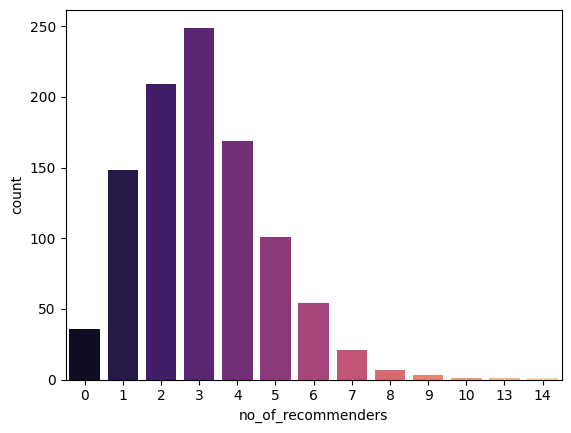

In [17]:
sns.countplot(x='no_of_recommenders', data=recommendations, palette='magma')

In [18]:
G = nx.DiGraph()

G.add_edges_from(recommendation)

def find_reciprocal_recommendations(graph):
    reciprocal_pairs = []
    for u, v in graph.edges():
        if graph.has_edge(v, u):
            reciprocal_pairs.append((u, v))
    return reciprocal_pairs

def calculate_pagerank(graph):
    return nx.pagerank(graph)

reciprocal_pairs = find_reciprocal_recommendations(G)
print("Reciprocal Recommendations:")
for pair in reciprocal_pairs:
    print(pair)

Reciprocal Recommendations:
(469, 38)
(3, 194)
(194, 3)
(338, 638)
(7, 149)
(149, 7)
(851, 164)
(11, 970)
(970, 11)
(138, 784)
(756, 182)
(35, 295)
(295, 35)
(38, 469)
(41, 961)
(961, 41)
(661, 571)
(625, 935)
(204, 302)
(495, 522)
(519, 509)
(241, 484)
(649, 911)
(206, 467)
(83, 693)
(693, 83)
(370, 995)
(125, 208)
(324, 663)
(115, 339)
(339, 115)
(118, 599)
(599, 118)
(704, 973)
(706, 745)
(208, 125)
(128, 553)
(553, 128)
(168, 813)
(784, 138)
(156, 286)
(326, 284)
(286, 156)
(867, 254)
(867, 612)
(995, 370)
(164, 851)
(813, 168)
(182, 756)
(372, 807)
(889, 909)
(610, 345)
(302, 204)
(467, 206)
(254, 867)
(735, 279)
(909, 889)
(909, 327)
(223, 593)
(593, 223)
(484, 241)
(255, 322)
(322, 255)
(638, 338)
(279, 735)
(522, 495)
(284, 326)
(807, 372)
(767, 579)
(327, 909)
(663, 324)
(642, 948)
(337, 883)
(883, 337)
(935, 625)
(345, 610)
(905, 450)
(397, 847)
(847, 397)
(596, 990)
(948, 642)
(973, 704)
(450, 905)
(579, 767)
(571, 661)
(509, 519)
(911, 649)
(745, 706)
(990, 596)
(612, 867)


In [19]:
pagerank_scores = calculate_pagerank(G)
print("\nPageRank Scores (influence):")
for node, score in pagerank_scores.items():
    print(f"{node}: {score:.4f}")


PageRank Scores (influence):
0: 0.0006
218: 0.0010
391: 0.0009
1: 0.0007
412: 0.0003
869: 0.0007
233: 0.0007
289: 0.0014
2: 0.0006
582: 0.0011
624: 0.0004
592: 0.0003
662: 0.0003
469: 0.0021
3: 0.0007
194: 0.0008
122: 0.0007
4: 0.0004
763: 0.0018
726: 0.0012
589: 0.0005
977: 0.0005
950: 0.0018
543: 0.0005
30: 0.0018
5: 0.0030
938: 0.0014
338: 0.0013
417: 0.0012
932: 0.0009
16: 0.0015
6: 0.0007
232: 0.0011
390: 0.0009
7: 0.0005
149: 0.0009
366: 0.0010
376: 0.0017
8: 0.0010
171: 0.0005
687: 0.0016
159: 0.0020
9: 0.0009
102: 0.0006
851: 0.0011
123: 0.0024
794: 0.0004
684: 0.0007
10: 0.0009
962: 0.0006
955: 0.0012
481: 0.0010
11: 0.0005
586: 0.0009
970: 0.0009
12: 0.0006
202: 0.0008
13: 0.0004
786: 0.0006
987: 0.0009
14: 0.0004
837: 0.0023
15: 0.0009
748: 0.0009
511: 0.0014
993: 0.0009
963: 0.0010
445: 0.0020
751: 0.0006
277: 0.0008
565: 0.0008
17: 0.0004
475: 0.0019
614: 0.0011
404: 0.0004
506: 0.0013
18: 0.0006
328: 0.0005
750: 0.0009
306: 0.0010
19: 0.0013
278: 0.0014
671: 0.0011
20: 0

<Axes: ylabel='Count'>

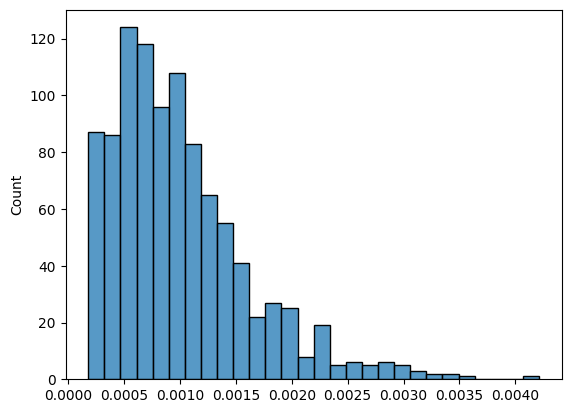

In [20]:
sns.histplot(list(pagerank_scores.values()))

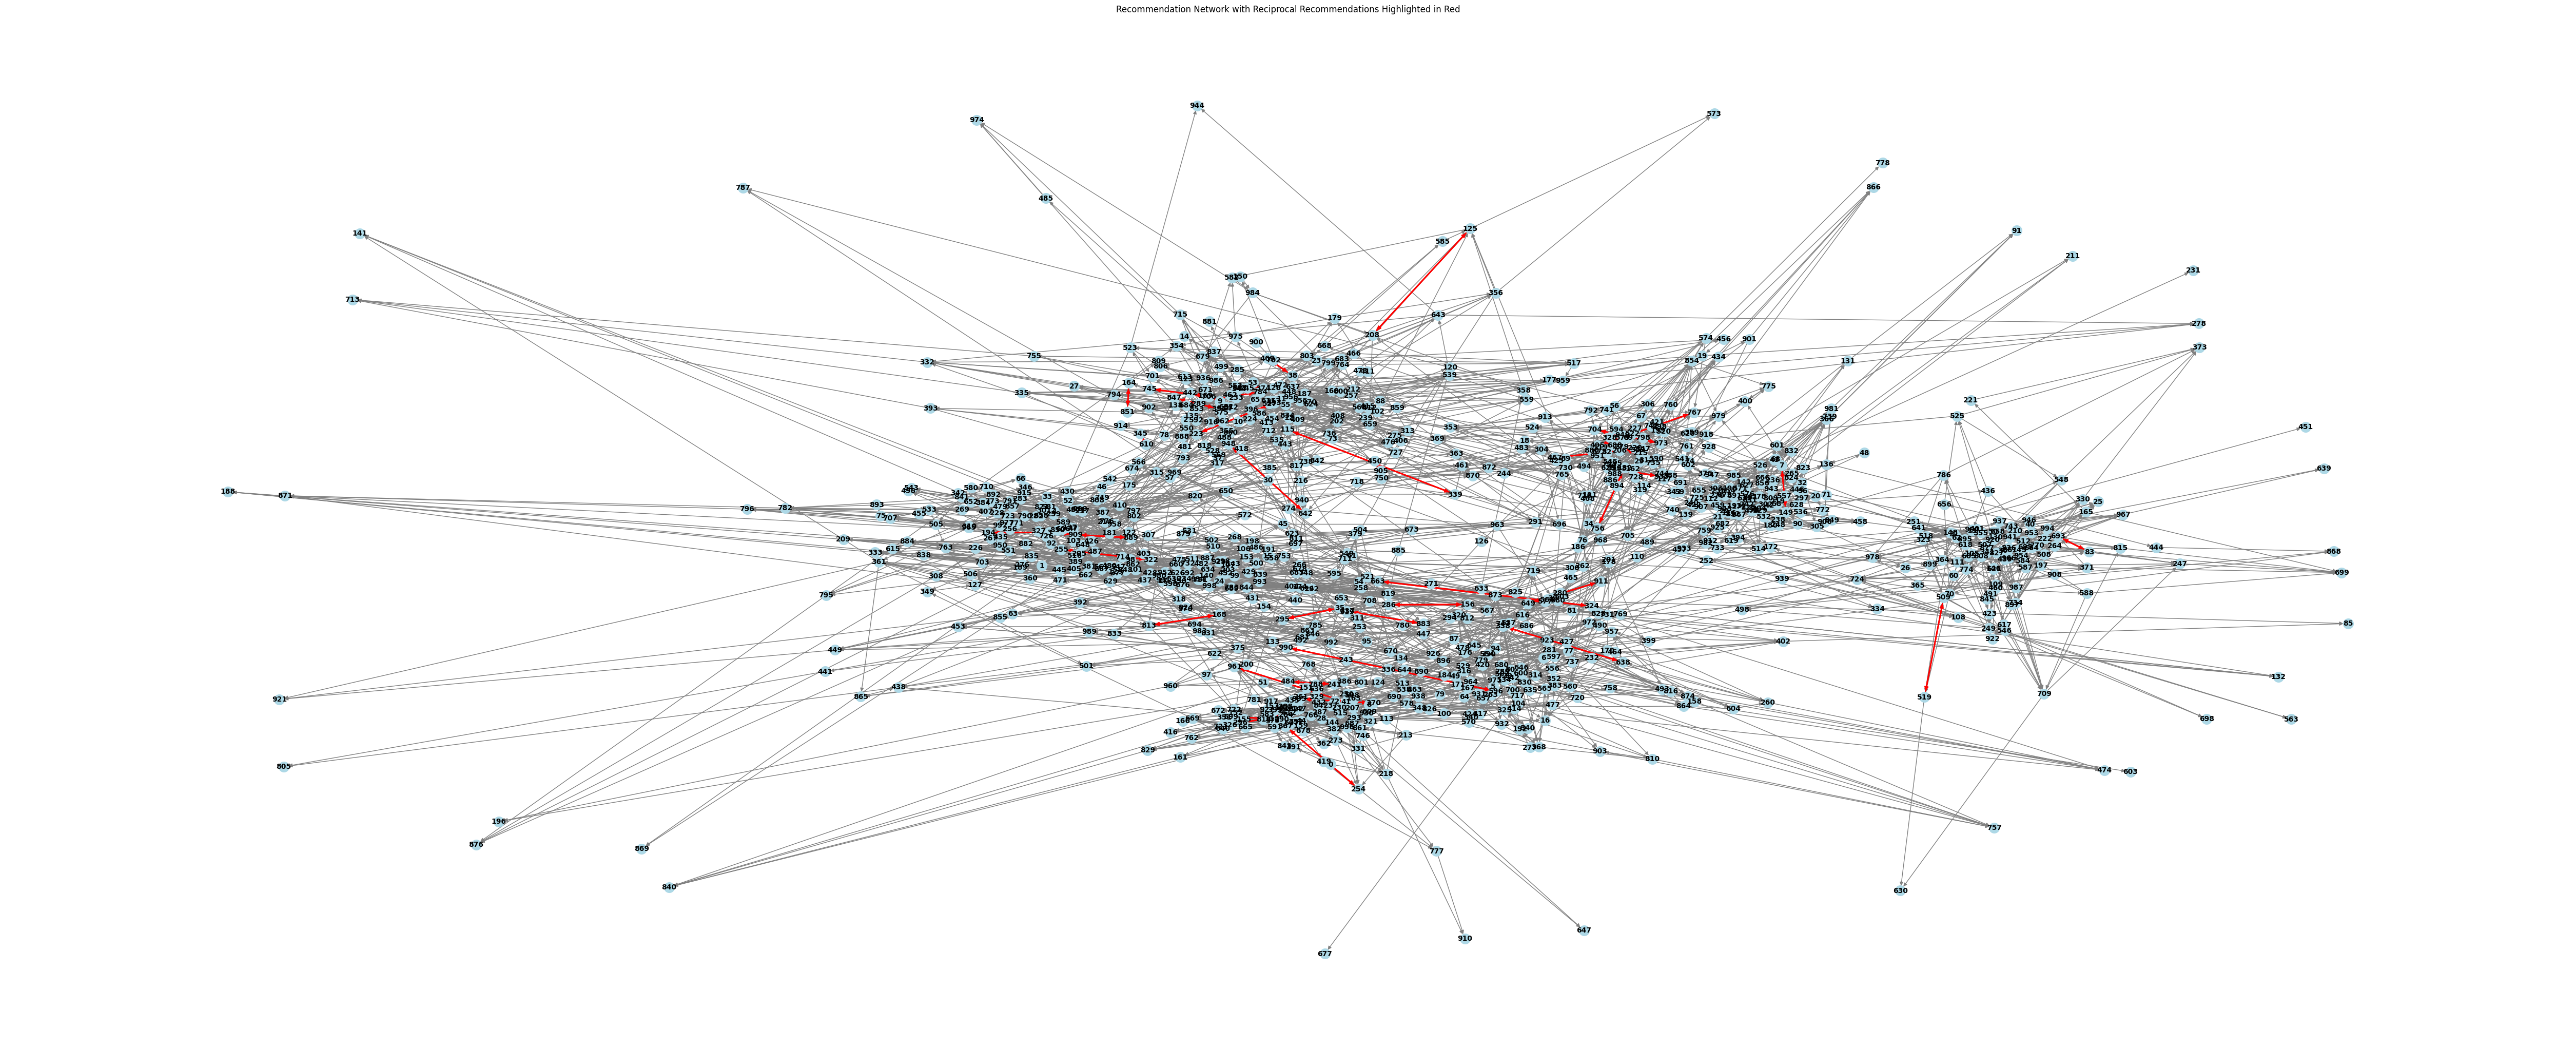

In [21]:
plt.figure(figsize=(50, 20))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=200, font_size=10, font_weight='bold', edge_color='gray')
nx.draw_networkx_edges(G, pos, edgelist=reciprocal_pairs, edge_color='red', width=2)
plt.title("Recommendation Network with Reciprocal Recommendations Highlighted in Red")
plt.show()

In [22]:
def extract_text_from_pdf(pdf_path):
    text = ""
    with pdfplumber.open(pdf_path) as pdf:
        for page in pdf.pages:
            text += page.extract_text() + "\n"
    return text

In [23]:
job = []
for i in tqdm(range(1000)):
  path = f"/content/resumes/Resume_of_ID_{i}.pdf"
  text = ""
  with pdfplumber.open(path) as pdf:
        for page in pdf.pages:
            text += page.extract_text() + "\n"
  lines = text.split('\n')
  first_line = lines[0]
  job.append(first_line.lower())

100%|██████████| 1000/1000 [15:56<00:00,  1.05it/s]


In [24]:
jobs_df = pd.DataFrame(job, columns=['Job'])
jobs_df

Job
0          bilingual language arts sixth grade teacher
1    mortgage banking default operations specialist ii
2                                       guest lecturer
3                                           accountant
4                                     staff accountant
..                                                 ...
995                           culinary arts instructor
996                            middle school principal
997                information technology technician i
998                         dealership finance manager
999        information technology and aws admin intern

[1000 rows x 1 columns]

In [25]:
jobs_df = jobs_df.to_csv('jobs.csv')

In [26]:
jobs_df = pd.read_csv('/content/jobs.csv')

In [27]:
def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    date_sym = ["/","-"]
    for word in words:
        if word not in date_sym:
            new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def replace_numbers(word_list):
    """Replace all interger occurrences in list of tokenized words with textual representation"""
    p = inflect.engine()
    new_list = []
    for word in word_list:
        new_word = ""
        for char in word:
            if char.isdigit():
                new_char = p.number_to_words(char)
                new_word = new_word + new_char
            else:
                new_word = new_word + char
        new_list.append(new_word)
    return (new_list)

def stem_words(words):
    ps =PorterStemmer()
    return [ps.stem(w) for w in words]

def lemmatize_words(words):
    lemmatizer = WordNetLemmatizer()
    return (lemmatizer.lemmatize(w,pos="a") for w in words)

def remove_stop_words(words):
    stop_words = set(stopwords.words('english'))
    return [w for w in words if not w in stop_words]

In [28]:
def cleaning_resume(filename):
    parsed = parser.from_file(filename)
    content= parsed["content"].strip()
    word_list = nltk.word_tokenize(content)
    word_list = to_lowercase(word_list)
    word_list = remove_punctuation(word_list)
    word_list = replace_numbers(word_list)
    word_list = lemmatize_words(word_list)
    word_list = stem_words(word_list)
    word_list = remove_stop_words(word_list)
    word_text = ' '.join(word_list)

    return word_text

In [29]:
def complete_resume(filename):
  parsed = parser.from_file(filename)
  content= parsed["content"].strip()
  word_list = nltk.word_tokenize(content)
  word_text = ' '.join(word_list)

  return word_text

In [30]:
cleaned = cleaning_resume('/content/resumes/Resume_of_ID_0.pdf')

2024-09-29 02:29:27,447 [MainThread  ] [INFO ]  Retrieving http://search.maven.org/remotecontent?filepath=org/apache/tika/tika-server-standard/2.6.0/tika-server-standard-2.6.0.jar to /tmp/tika-server.jar.
INFO:tika.tika:Retrieving http://search.maven.org/remotecontent?filepath=org/apache/tika/tika-server-standard/2.6.0/tika-server-standard-2.6.0.jar to /tmp/tika-server.jar.
2024-09-29 02:29:28,816 [MainThread  ] [INFO ]  Retrieving http://search.maven.org/remotecontent?filepath=org/apache/tika/tika-server-standard/2.6.0/tika-server-standard-2.6.0.jar.md5 to /tmp/tika-server.jar.md5.
INFO:tika.tika:Retrieving http://search.maven.org/remotecontent?filepath=org/apache/tika/tika-server-standard/2.6.0/tika-server-standard-2.6.0.jar.md5 to /tmp/tika-server.jar.md5.
2024-09-29 02:29:29,697 [MainThread  ] [WARNI]  Failed to see startup log message; retrying...
2024-09-29 02:29:34,720 [MainThread  ] [WARNI]  Failed to see startup log message; retrying...


In [31]:
comp = complete_resume('/content/resumes/Resume_of_ID_0.pdf')

In [32]:
print(comp)

BILINGUAL LANGUAGE ARTS SIXTH GRADE TEACHER Summary Dedicated and enthusiastic professional with over four years ' experience in education . Proven expertise in establishing rapport and building trust among students , parents , administrators and community members . Possess strong communication skills and ability to partner across departments within and outside of an organization to meet the needs of students . Motivating students School improvement committee Interactive teaching/learning Interdisciplinary teaching Innovative lesson planning Effectively work with parents Professional Experience 08/2014 to Current Bilingual Language Arts Sixth Grade Teacher Company Name ï¼​ City , State Developed and implemented interesting and interactive learning mediums to increase student understanding of course materials and build community within the classroom Participate in the development of intervention plans for students within the classroom setting , during MVP time ( tutoring hour ) as well 

In [33]:
rec = cleaning_resume('/content/recoms/Recommendation_Letters_of_ID_0/Recommendation_From_ID_218.txt')

In [34]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
vec = CountVectorizer()
X = vec.fit_transform([cleaned])
Y = vec.transform([rec])
similarity = cosine_similarity(X, Y)
print(similarity)

[[0.59500462]]


In [35]:
final_arr = []
for i in tqdm(range(1000)):
  cleaned = cleaning_resume(f'/content/resumes/Resume_of_ID_{i}.pdf')
  X = vec.fit_transform([cleaned])
  temp_arr = []
  if not os.path.exists(f'/content/recoms/Recommendation_Letters_of_ID_{i}'):
    final_arr.append(0)
    continue
  for rec in os.listdir(f'/content/recoms/Recommendation_Letters_of_ID_{i}'):
    clean_rec = cleaning_resume(f'/content/recoms/Recommendation_Letters_of_ID_{i}/{rec}')
    Y = vec.transform([clean_rec])
    similarity = cosine_similarity(X, Y)
    temp_arr.append(similarity)
  final_arr.append(float(sum(temp_arr)/len(temp_arr)))

  0%|          | 0/1000 [00:00<?, ?it/s]<ipython-input-35-d1a86cd101e4>:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  final_arr.append(float(sum(temp_arr)/len(temp_arr)))
100%|██████████| 1000/1000 [02:50<00:00,  5.87it/s]


In [36]:
final_arr = pd.Series(final_arr)

In [37]:
final_arr

0      0.558888
1      0.391576
2      0.574393
3      0.449661
4      0.564614
         ...   
995    0.299543
996    0.482379
997    0.328146
998    0.668887
999    0.484231
Length: 1000, dtype: float64

In [38]:
final_arr_inter = []
for i in tqdm(range(1000)):
  temp_arr = []
  if not os.path.exists(f'/content/recoms/Recommendation_Letters_of_ID_{i}'):
    final_arr_inter.append(0)
    continue
  if len(os.listdir(f'/content/recoms/Recommendation_Letters_of_ID_{i}')) == 1:
    final_arr_inter.append(0)
    continue
  for j in os.listdir(f'/content/recoms/Recommendation_Letters_of_ID_{i}'):
    for k in os.listdir(f'/content/recoms/Recommendation_Letters_of_ID_{i}'):
      if j == k:
        continue
      clean_rec1 = cleaning_resume(f'/content/recoms/Recommendation_Letters_of_ID_{i}/{j}')
      clean_rec2 = cleaning_resume(f'/content/recoms/Recommendation_Letters_of_ID_{i}/{k}')
      X = vec.fit_transform([clean_rec1])
      Y = vec.transform([clean_rec2])
      similarity = cosine_similarity(X, Y)
      temp_arr.append(similarity)
  final_arr_inter.append(float(sum(temp_arr)/len(temp_arr)))

  0%|          | 0/1000 [00:00<?, ?it/s]<ipython-input-38-b028284189e5>:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  final_arr_inter.append(float(sum(temp_arr)/len(temp_arr)))
100%|██████████| 1000/1000 [06:02<00:00,  2.76it/s]


In [39]:
final_arr_inter = pd.Series(final_arr_inter)

In [40]:
final_arr_inter

0      0.720127
1      0.578022
2      0.731866
3      0.718413
4      0.773989
         ...   
995    0.625891
996    0.686164
997    0.580962
998    0.807617
999    0.673021
Length: 1000, dtype: float64

In [41]:
df = pd.concat([final_arr,final_arr_inter], axis=1)

In [42]:
df

0         1
0    0.558888  0.720127
1    0.391576  0.578022
2    0.574393  0.731866
3    0.449661  0.718413
4    0.564614  0.773989
..        ...       ...
995  0.299543  0.625891
996  0.482379  0.686164
997  0.328146  0.580962
998  0.668887  0.807617
999  0.484231  0.673021

[1000 rows x 2 columns]

<Axes: xlabel='cor_with_recomm_bins', ylabel='count'>

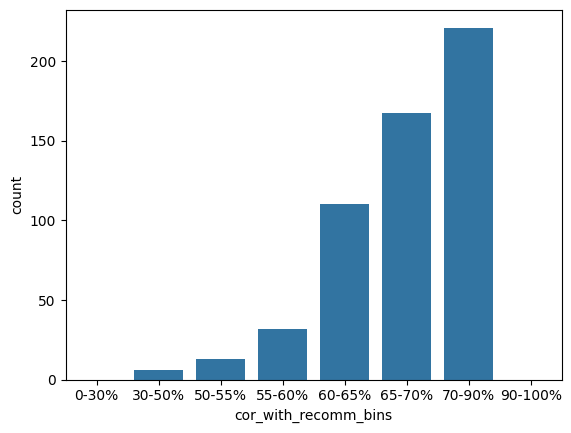

In [43]:

cor_with_recomm_bins = [0, 0.3, 0.5, 0.55, 0.6, 0.65, 0.7, 0.9, 1]
cor_with_recomm_labels = ['0-30%', '30-50%', '50-55%', '55-60%', '60-65%', '65-70%', '70-90%', '90-100%']
df['cor_with_recomm_bins'] = pd.cut(df.iloc[:, 1], bins=cor_with_recomm_bins, labels=cor_with_recomm_labels)
sns.countplot(x='cor_with_recomm_bins', data=df)

<Axes: >

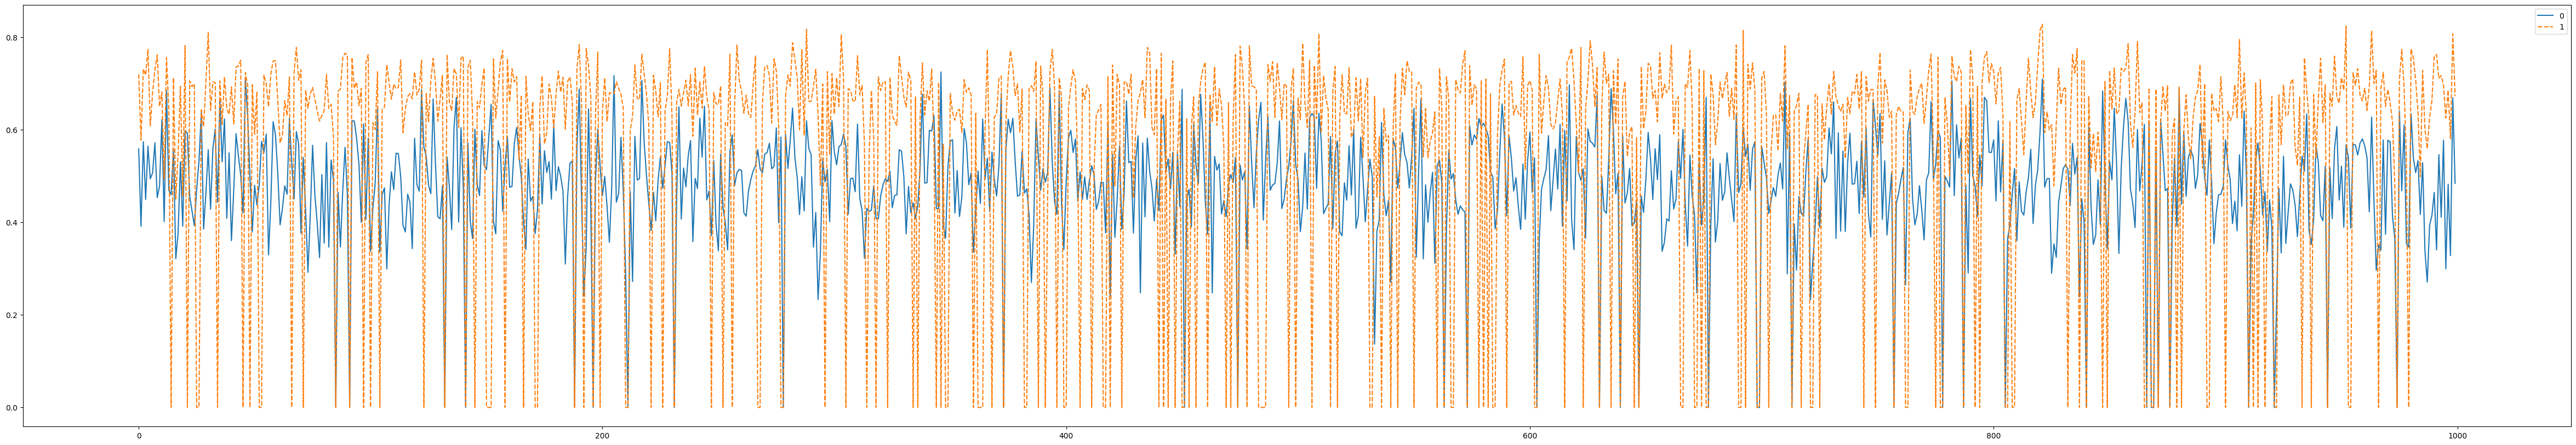

In [44]:
plt.figure(figsize=(60, 10))
sns.lineplot(data=df)

In [45]:
sns.set_style('darkgrid')

In [46]:
df

0         1 cor_with_recomm_bins
0    0.558888  0.720127               70-90%
1    0.391576  0.578022               55-60%
2    0.574393  0.731866               70-90%
3    0.449661  0.718413               70-90%
4    0.564614  0.773989               70-90%
..        ...       ...                  ...
995  0.299543  0.625891               60-65%
996  0.482379  0.686164               65-70%
997  0.328146  0.580962               55-60%
998  0.668887  0.807617               70-90%
999  0.484231  0.673021               65-70%

[1000 rows x 3 columns]

In [47]:
vague_positive_words = [
    "motivated",
    "dedicated",
    "hardworking",
    "driven",
    "dynamic",
    "team player",
    "passionate",
    "results-oriented",
    "enthusiastic",
    "proactive",
    "innovative",
    "detail-oriented",
    "highly organized",
    "dependable",
    "excellent communication skills",
    "problem solver",
    "fast learner",
    "creative thinker",
    "strategic thinker",
    "goal-oriented",
    "adaptable",
    "strong work ethic",
    "leader",
    "go-getter",
    "self-starter",
    "resourceful",
    "reliable",
    "efficient",
    "effective",
    "flexible",
    "ambitious",
    "committed",
    "versatile",
    "solution-oriented",
    "people person",
    "passionate professional",
    "thrives in fast-paced environments",
    "multi-tasker",
    "visionary",
    "energetic",
    "collaborative",
    "experienced",
    "customer-focused",
    "loyal",
    "supportive",
    "high achiever",
    "empathetic",
    "client-oriented",
    "forward-thinking",
    "forward",
    "thinking",
    "dedicated team player",
    "team player",
    "team-player"
    "effective communicator",
    "performance-driven"
]

In [48]:
final_arr = []
for i in tqdm(range(1000)):
  if not os.path.exists(f'/content/recoms/Recommendation_Letters_of_ID_{i}'):
    final_arr.append(0)
    continue
  temp_arr = 0
  for rec in os.listdir(f'/content/recoms/Recommendation_Letters_of_ID_{i}'):
    comp = complete_resume(f'/content/resumes/Resume_of_ID_{i}.pdf')
    for word in vague_positive_words:
      if word in comp:
        temp_arr += 1
  final_arr.append(temp_arr)

100%|██████████| 1000/1000 [02:09<00:00,  7.75it/s]


In [49]:
final_arr = pd.Series(final_arr)

In [50]:
df = pd.concat([df, final_arr], axis=1)

In [51]:
df.columns = ['corr_with_resume', 'inter_corr', 'corr_with_resume_bins', 'vagueness']

In [52]:
df

corr_with_resume  inter_corr corr_with_resume_bins  vagueness
0            0.558888    0.720127                70-90%          2
1            0.391576    0.578022                55-60%          4
2            0.574393    0.731866                70-90%          0
3            0.449661    0.718413                70-90%          4
4            0.564614    0.773989                70-90%         21
..                ...         ...                   ...        ...
995          0.299543    0.625891                60-65%          6
996          0.482379    0.686164                65-70%         12
997          0.328146    0.580962                55-60%          0
998          0.668887    0.807617                70-90%          0
999          0.484231    0.673021                65-70%          3

[1000 rows x 4 columns]

<Axes: xlabel='vagueness', ylabel='count'>

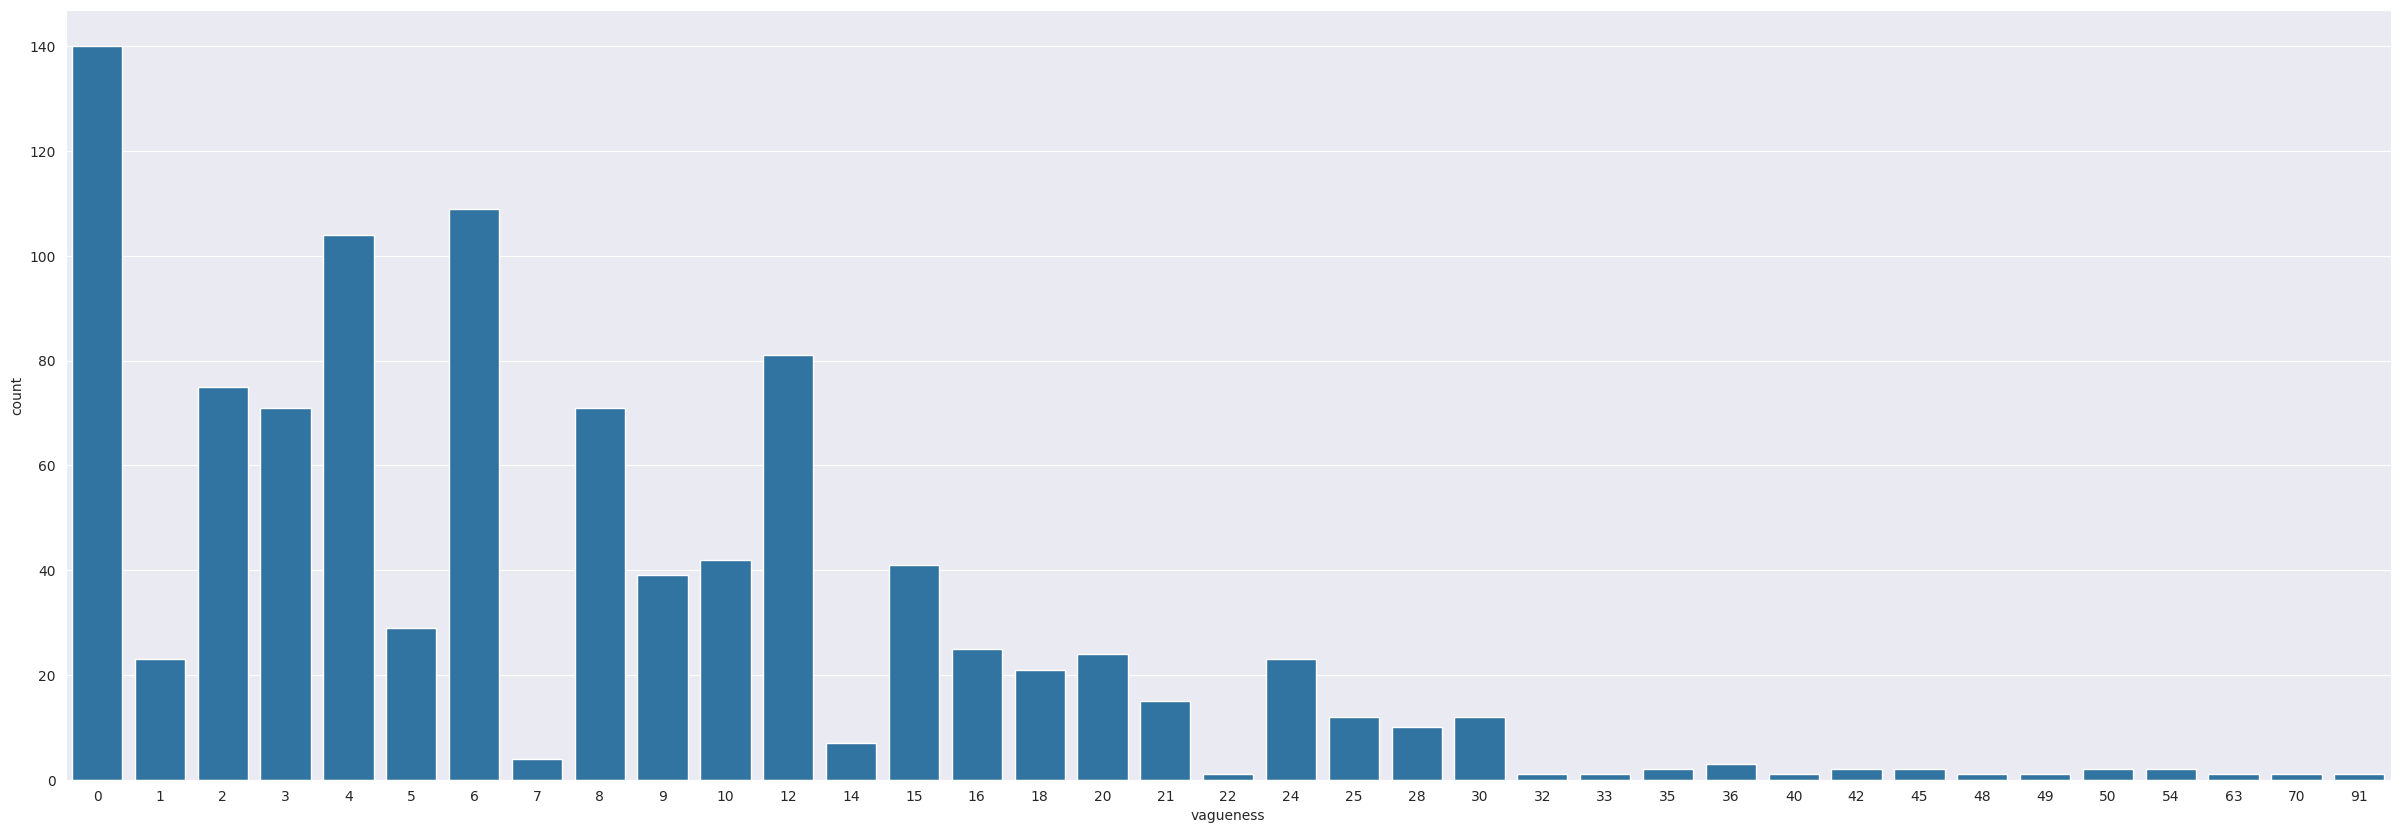

In [53]:
plt.figure(figsize=(30, 10))
sns.countplot(x='vagueness', data=df)

In [54]:
cor_with_recomm_bins = [0, 0.3, 0.5, 0.55, 0.6, 0.65, 0.7, 0.9, 1]
cor_with_recomm_bins_labels = [0.3, 0.5, 0.55, 0.6, 0.65, 0.7, 0.9, 1]
df['cor_with_recomm_bins'] = pd.cut(df.iloc[:, 1], bins=cor_with_recomm_bins, labels=cor_with_recomm_bins_labels)

In [55]:
df = pd.concat([df, jobs_df], axis=1)

In [56]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [57]:
df = pd.concat([recommendations, df], axis=1)

In [58]:
df

ID                     Recommenders ID  no_of_recommenders  \
0      0                          [218, 391]                   2   
1      1                [412, 869, 233, 289]                   4   
2      2           [582, 624, 592, 662, 469]                   5   
3      3                          [194, 122]                   2   
4      4  [763, 726, 589, 977, 950, 543, 30]                   7   
..   ...                                 ...                 ...   
995  995                                 [0]                   0   
996  996                                 [0]                   0   
997  997                                 [0]                   0   
998  998                                 [0]                   0   
999  999                                 [0]                   0   

     corr_with_resume  inter_corr corr_with_resume_bins  vagueness  \
0            0.558888    0.720127                70-90%          2   
1            0.391576    0.578022                55-60%          4   
2            0.574393    0.731866                70-90%          0   
3            0.449661    0.718413                70-90%          4   
4            0.564614    0.773989                70-90%         21   
..                ...         ...                   ...        ...   
995          0.299543    0.625891                60-65%          6   
996          0.482379    0.686164                65-70%         12   
997          0.328146    0.580962                55-60%          0   
998          0.668887    0.807617                70-90%          0   
999          0.484231    0.673021                65-70%          3   

    cor_with_recomm_bins                                                Job  
0                   0.90        bilingual language arts sixth grade teacher  
1                   0.60  mortgage banking default operations specialist ii  
2                   0.90                                     guest lecturer  
3                   0.90                                         accountant  
4                   0.90                                   staff accountant  
..                   ...                                                ...  
995                 0.65                           culinary arts instructor  
996                 0.70                            middle school principal  
997                 0.60                information technology technician i  
998                 0.90                         dealership finance manager  
999                 0.70        information technology and aws admin intern  

[1000 rows x 9 columns]

In [59]:
df_skills = pd.read_csv('/content/drive/MyDrive/df_resume_sorted.csv')

In [65]:
import re
from PyPDF2 import PdfFileReader

def extract_text_from_pdf(pdf_path):
    reader = PdfReader(pdf_path)
    text = ''
    for page in reader.pages:
        text += page.extract_text()
    return text

def extract_skills(text):
    skills_list = []

    skills_pattern = r"(?i)skills\s*\n(.*?)\n(?:\w|\Z)"

    match = re.search(skills_pattern, text, re.DOTALL)

    if match:
        skills_text = match.group(1)

        skills_list = [skill.strip() for skill in re.split(r",|\n", skills_text) if skill.strip()]

    return skills_list


pdf_path = '/content/resumes/Resume_of_ID_1.pdf'
resume_text = extract_text_from_pdf(pdf_path)
skills = extract_skills(resume_text)

print("Extracted Skills:", skills)

Extracted Skills: ['Adobe', 'Photoshop', 'streamline', 'Attorney', 'audio', 'closing', 'Hardware', 'Computer Networking', 'client', 'clients', 'Customer Service', 'decision making']


In [66]:
skill_list = []
for i in tqdm(range(1000)):
  pdf_path = f'/content/resumes/Resume_of_ID_{i}.pdf'
  resume_text = extract_text_from_pdf(pdf_path)
  skills = extract_skills(resume_text)
  skill_list.append(skills)

100%|██████████| 1000/1000 [05:32<00:00,  3.01it/s]


In [68]:
skill_list = pd.Series(skill_list)

In [69]:
df = pd.concat([df, skill_list], axis=1)

In [70]:
df

ID                     Recommenders ID  no_of_recommenders  \
0      0                          [218, 391]                   2   
1      1                [412, 869, 233, 289]                   4   
2      2           [582, 624, 592, 662, 469]                   5   
3      3                          [194, 122]                   2   
4      4  [763, 726, 589, 977, 950, 543, 30]                   7   
..   ...                                 ...                 ...   
995  995                                 [0]                   0   
996  996                                 [0]                   0   
997  997                                 [0]                   0   
998  998                                 [0]                   0   
999  999                                 [0]                   0   

     corr_with_resume  inter_corr corr_with_resume_bins  vagueness  \
0            0.558888    0.720127                70-90%          2   
1            0.391576    0.578022                55-60%          4   
2            0.574393    0.731866                70-90%          0   
3            0.449661    0.718413                70-90%          4   
4            0.564614    0.773989                70-90%         21   
..                ...         ...                   ...        ...   
995          0.299543    0.625891                60-65%          6   
996          0.482379    0.686164                65-70%         12   
997          0.328146    0.580962                55-60%          0   
998          0.668887    0.807617                70-90%          0   
999          0.484231    0.673021                65-70%          3   

    cor_with_recomm_bins                                                Job  \
0                   0.90        bilingual language arts sixth grade teacher   
1                   0.60  mortgage banking default operations specialist ii   
2                   0.90                                     guest lecturer   
3                   0.90                                         accountant   
4                   0.90                                   staff accountant   
..                   ...                                                ...   
995                 0.65                           culinary arts instructor   
996                 0.70                            middle school principal   
997                 0.60                information technology technician i   
998                 0.90                         dealership finance manager   
999                 0.70        information technology and aws admin intern   

     Average_Skill_Similarity  \
0                    0.853286   
1                    0.879560   
2                    0.883845   
3                    0.870890   
4                    0.872650   
..                        ...   
995                  0.863470   
996                  0.956499   
997                  0.938286   
998                  0.000000   
999                  0.819165   

                                                     0  
0    [arts, English, instruction, Latin, letters, L...  
1    [Adobe, Photoshop, streamline, Attorney, audio...  
2    [basic, Council, English, Instructor, LANGUAGE...  
3    [Accounting, approach, AS400, auditing, bank r...  
4                       [Expert in customer relations]  
..                                                 ...  
995  [Very skillful in teaching, coaching, motivati...  
996                                  [Human resources]  
997                          [Active Directory, Azure]  
998                                           [Skills]  
999  [IP networking protocols :TCP/IP, UDP, HTTP/S,...  

[1000 rows x 11 columns]

In [71]:
from gensim.models import Word2Vec
from sklearn.metrics.pairwise import cosine_similarity

In [77]:
for index, row in tqdm(df.iterrows()):
  job_list = row['Job'].split()
  sentences = [row[0], job_list]
  model = Word2Vec(sentences, min_count=1)
  candidate_embeddings = [model.wv[skill] for skill in row[0]]
  job_embeddings = [model.wv[skill] for skill in job_list]
  if len(candidate_embeddings) == 0 or len(job_embeddings) == 0:
    df.at[index, 'job_skill_similarity'] = 0
    continue
  avg_candidate_embedding = sum(candidate_embeddings) / len(candidate_embeddings)
  avg_job_embedding = sum(job_embeddings) / len(job_embeddings)
  similarity = cosine_similarity([avg_candidate_embedding], [avg_job_embedding])
  df.at[index, 'job_skill_similarity'] = similarity

1000it [00:08, 112.58it/s]


In [78]:
df

ID                     Recommenders ID  no_of_recommenders  \
0      0                          [218, 391]                   2   
1      1                [412, 869, 233, 289]                   4   
2      2           [582, 624, 592, 662, 469]                   5   
3      3                          [194, 122]                   2   
4      4  [763, 726, 589, 977, 950, 543, 30]                   7   
..   ...                                 ...                 ...   
995  995                                 [0]                   0   
996  996                                 [0]                   0   
997  997                                 [0]                   0   
998  998                                 [0]                   0   
999  999                                 [0]                   0   

     corr_with_resume  inter_corr corr_with_resume_bins  vagueness  \
0            0.558888    0.720127                70-90%          2   
1            0.391576    0.578022                55-60%          4   
2            0.574393    0.731866                70-90%          0   
3            0.449661    0.718413                70-90%          4   
4            0.564614    0.773989                70-90%         21   
..                ...         ...                   ...        ...   
995          0.299543    0.625891                60-65%          6   
996          0.482379    0.686164                65-70%         12   
997          0.328146    0.580962                55-60%          0   
998          0.668887    0.807617                70-90%          0   
999          0.484231    0.673021                65-70%          3   

    cor_with_recomm_bins                                                Job  \
0                   0.90        bilingual language arts sixth grade teacher   
1                   0.60  mortgage banking default operations specialist ii   
2                   0.90                                     guest lecturer   
3                   0.90                                         accountant   
4                   0.90                                   staff accountant   
..                   ...                                                ...   
995                 0.65                           culinary arts instructor   
996                 0.70                            middle school principal   
997                 0.60                information technology technician i   
998                 0.90                         dealership finance manager   
999                 0.70        information technology and aws admin intern   

     Average_Skill_Similarity  \
0                    0.853286   
1                    0.879560   
2                    0.883845   
3                    0.870890   
4                    0.872650   
..                        ...   
995                  0.863470   
996                  0.956499   
997                  0.938286   
998                  0.000000   
999                  0.819165   

                                                     0  job_skill_similarity  
0    [arts, English, instruction, Latin, letters, L...              0.196829  
1    [Adobe, Photoshop, streamline, Attorney, audio...             -0.096229  
2    [basic, Council, English, Instructor, LANGUAGE...             -0.008154  
3    [Accounting, approach, AS400, auditing, bank r...              0.088181  
4                       [Expert in customer relations]             -0.053785  
..                                                 ...                   ...  
995  [Very skillful in teaching, coaching, motivati...              0.040736  
996                                  [Human resources]             -0.032694  
997                          [Active Directory, Azure]              0.085780  
998                                           [Skills]             -0.032694  
999  [IP networking protocols :TCP/IP, UDP, HTTP/S,...              0.160860  

[1000 rows x 12 columns]

<Axes: xlabel='job_skill_similarity', ylabel='Count'>

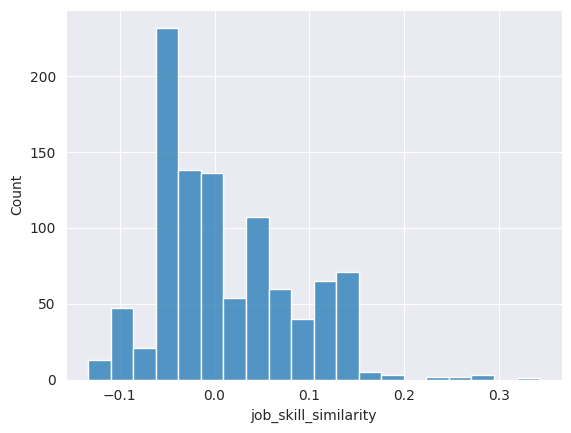

In [82]:
sns.histplot(x='job_skill_similarity', data=df, bins=20)

In [84]:
model = Word2Vec(df[0].tolist(), min_count=1)

In [86]:
def get_inter_skill_similarity(skills):
  embeddings = [model.wv[skill] for skill in skills if skill in model.wv]
  if len(embeddings) < 2:
    return 0  # Handle cases with too few skills
  similarity_matrix = cosine_similarity(embeddings)
  # Take average of off-diagonal elements for inter-skill similarity
  return np.sum(similarity_matrix - np.eye(len(embeddings))) / (len(embeddings) * (len(embeddings) - 1))

In [87]:
df['inter_skill_similarity'] = df[0].apply(get_inter_skill_similarity)

In [90]:
df['inter_skill_similarity'] = df['inter_skill_similarity'] * 10

In [91]:
df

ID                     Recommenders ID  no_of_recommenders  \
0      0                          [218, 391]                   2   
1      1                [412, 869, 233, 289]                   4   
2      2           [582, 624, 592, 662, 469]                   5   
3      3                          [194, 122]                   2   
4      4  [763, 726, 589, 977, 950, 543, 30]                   7   
..   ...                                 ...                 ...   
995  995                                 [0]                   0   
996  996                                 [0]                   0   
997  997                                 [0]                   0   
998  998                                 [0]                   0   
999  999                                 [0]                   0   

     corr_with_resume  inter_corr corr_with_resume_bins  vagueness  \
0            0.558888    0.720127                70-90%          2   
1            0.391576    0.578022                55-60%          4   
2            0.574393    0.731866                70-90%          0   
3            0.449661    0.718413                70-90%          4   
4            0.564614    0.773989                70-90%         21   
..                ...         ...                   ...        ...   
995          0.299543    0.625891                60-65%          6   
996          0.482379    0.686164                65-70%         12   
997          0.328146    0.580962                55-60%          0   
998          0.668887    0.807617                70-90%          0   
999          0.484231    0.673021                65-70%          3   

    cor_with_recomm_bins                                                Job  \
0                   0.90        bilingual language arts sixth grade teacher   
1                   0.60  mortgage banking default operations specialist ii   
2                   0.90                                     guest lecturer   
3                   0.90                                         accountant   
4                   0.90                                   staff accountant   
..                   ...                                                ...   
995                 0.65                           culinary arts instructor   
996                 0.70                            middle school principal   
997                 0.60                information technology technician i   
998                 0.90                         dealership finance manager   
999                 0.70        information technology and aws admin intern   

     Average_Skill_Similarity  \
0                    0.853286   
1                    0.879560   
2                    0.883845   
3                    0.870890   
4                    0.872650   
..                        ...   
995                  0.863470   
996                  0.956499   
997                  0.938286   
998                  0.000000   
999                  0.819165   

                                                     0  job_skill_similarity  \
0    [arts, English, instruction, Latin, letters, L...              0.196829   
1    [Adobe, Photoshop, streamline, Attorney, audio...             -0.096229   
2    [basic, Council, English, Instructor, LANGUAGE...             -0.008154   
3    [Accounting, approach, AS400, auditing, bank r...              0.088181   
4                       [Expert in customer relations]             -0.053785   
..                                                 ...                   ...   
995  [Very skillful in teaching, coaching, motivati...              0.040736   
996                                  [Human resources]             -0.032694   
997                          [Active Directory, Azure]              0.085780   
998                                           [Skills]             -0.032694   
999  [IP networking protocols :TCP/IP, UDP, HTTP/S,...              0.160860   

     inter_skill_similarity  
0          

<Axes: xlabel='inter_skill_similarity', ylabel='Count'>

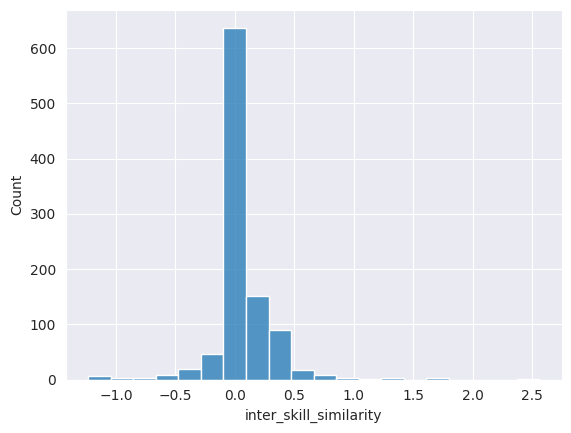

In [92]:
sns.histplot(x='inter_skill_similarity', data=df, bins=20)

In [ ]:
import spacy
import os

# Load the pre-trained spaCy model for English
nlp = spacy.load("en_core_web_sm")


# List of predefined personal connection keywords/phrases
connection_keywords = [
    "recommend", "appreciation", "rapport", "trust", "confidence",
    "observed", "awareness", "understanding", "collaborative", "worked with",
    "firsthand", "team", "value", "familiar", "personal", "commitment", "asset",
    "demonstrated", "consistently"
]
meaningful_connection_score = {}  # Dictionary to store the meaningful connection score for each resume

# Function to extract and count personal connection words/phrases from the text
def extract_personal_connection_phrases(text, keywords):
    doc = nlp(text)
    personal_phrases = []
    total_sentences = 0
    keyword_count = 0

    # Iterate through each sentence in the document
    for sent in doc.sents:
        total_sentences += 1
        for keyword in keywords:
          if keyword in sent.text.lower():  # Convert both to lowercase for case-insensitive matching
                personal_phrases.append(sent.text.strip())
                keyword_count += 1
                break  # If a keyword is found, move to the next sentence

    return personal_phrases, total_sentences, keyword_count

path = "/content/drive/MyDrive/Final_Recommendation_Letters"
for i in tqdm(range(1000)):

  path = f"/content/drive/MyDrive/Final_Recommendation_Letters/Recommendation_Letters_of_ID_{i}"
  if not os.path.isdir(path):
      print(f"Directory not found: {path}") # Print a message if the directory does not exist.
      continue
  for filename in os.listdir(path):
    if filename.endswith(".txt"):
      file_path = os.path.join(path, filename)
  # Open the file and read all lines into a list
  with open(file_path, 'r', encoding='latin-1') as file:
      lines = file.readlines()
      recommendation_text = ''.join(lines)
# Extract personal connection phrases and count occurrences
  personal_phrases, total_sentences, keyword_count = extract_personal_connection_phrases(recommendation_text, connection_keywords)
# Calculate meaningful connection score
  if total_sentences > 0:
    connection_score = keyword_count / total_sentences  # Ratio of meaningful sentences to total sentences
  else:
    connection_score = 0

# Normalize the score between 0 and 1
  connection_score = min(1.0, connection_score)
  meaningful_connection_score[i] = connection_score

# Output the results
  print(f"Total Sentences: {total_sentences}")
  print(f"Keyword Occurrences: {keyword_count}")
  print(f"Meaningful Connection Score: {connection_score:.2f}")

# Output the personal connection phrases found
  print("\nPersonal Connection Words/Phrases Found:")
  for phrase in personal_phrases:
      print(f"- {phrase}")

In [100]:
meaningful_df = pd.read_csv('/content/drive/MyDrive/meaningful_connection_score.csv')

In [101]:
meaningful_df

Unnamed: 0  Meaningful Connection Score
0             0                     0.666667
1             1                     0.500000
2             2                     0.800000
3             3                     0.428571
4             4                     0.500000
..          ...                          ...
995         876                     0.000000
996         910                     0.000000
997         921                     0.000000
998         944                     0.000000
999         974                     0.000000

[1000 rows x 2 columns]

In [ ]:
df = pd.concat([df, meaningful_df['Meaningful Connection Score']], axis=1)

In [97]:
page_rank = pd.Series(list(pagerank_scores.values()))

In [98]:
df = pd.concat([df, page_rank], axis=1)

In [99]:
df

ID                     Recommenders ID  no_of_recommenders  \
0      0                          [218, 391]                   2   
1      1                [412, 869, 233, 289]                   4   
2      2           [582, 624, 592, 662, 469]                   5   
3      3                          [194, 122]                   2   
4      4  [763, 726, 589, 977, 950, 543, 30]                   7   
..   ...                                 ...                 ...   
995  995                                 [0]                   0   
996  996                                 [0]                   0   
997  997                                 [0]                   0   
998  998                                 [0]                   0   
999  999                                 [0]                   0   

     corr_with_resume  inter_corr corr_with_resume_bins  vagueness  \
0            0.558888    0.720127                70-90%          2   
1            0.391576    0.578022                55-60%          4   
2            0.574393    0.731866                70-90%          0   
3            0.449661    0.718413                70-90%          4   
4            0.564614    0.773989                70-90%         21   
..                ...         ...                   ...        ...   
995          0.299543    0.625891                60-65%          6   
996          0.482379    0.686164                65-70%         12   
997          0.328146    0.580962                55-60%          0   
998          0.668887    0.807617                70-90%          0   
999          0.484231    0.673021                65-70%          3   

    cor_with_recomm_bins                                                Job  \
0                   0.90        bilingual language arts sixth grade teacher   
1                   0.60  mortgage banking default operations specialist ii   
2                   0.90                                     guest lecturer   
3                   0.90                                         accountant   
4                   0.90                                   staff accountant   
..                   ...                                                ...   
995                 0.65                           culinary arts instructor   
996                 0.70                            middle school principal   
997                 0.60                information technology technician i   
998                 0.90                         dealership finance manager   
999                 0.70        information technology and aws admin intern   

     Average_Skill_Similarity  \
0                    0.853286   
1                    0.879560   
2                    0.883845   
3                    0.870890   
4                    0.872650   
..                        ...   
995                  0.863470   
996                  0.956499   
997                  0.938286   
998                  0.000000   
999                  0.819165   

                                                     0  job_skill_similarity  \
0    [arts, English, instruction, Latin, letters, L...              0.196829   
1    [Adobe, Photoshop, streamline, Attorney, audio...             -0.096229   
2    [basic, Council, English, Instructor, LANGUAGE...             -0.008154   
3    [Accounting, approach, AS400, auditing, bank r...              0.088181   
4                       [Expert in customer relations]             -0.053785   
..                                                 ...                   ...   
995  [Very skillful in teaching, coaching, motivati...              0.040736   
996                                  [Human resources]             -0.032694   
997                          [Active Directory, Azure]              0.085780   
998                                           [Skills]             -0.032694   
999  [IP networking protocols :TCP/IP, UDP, HTTP/S,...              0.160860   

     inter_skill_similarity         0  
0

In [102]:
df.columns

Index([                      'ID',          'Recommenders ID',
             'no_of_recommenders',         'corr_with_resume',
                     'inter_corr',    'corr_with_resume_bins',
                      'vagueness',     'cor_with_recomm_bins',
                            'Job', 'Average_Skill_Similarity',
                                0,     'job_skill_similarity',
         'inter_skill_similarity',                          0],
      dtype='object')

In [109]:
df.head()

ID                     Recommenders ID  no_of_recommenders  \
0   0                          [218, 391]                   2   
1   1                [412, 869, 233, 289]                   4   
2   2           [582, 624, 592, 662, 469]                   5   
3   3                          [194, 122]                   2   
4   4  [763, 726, 589, 977, 950, 543, 30]                   7   

   corr_with_resume  inter_corr corr_with_resume_bins  vagueness  \
0          0.558888    0.720127                70-90%          2   
1          0.391576    0.578022                55-60%          4   
2          0.574393    0.731866                70-90%          0   
3          0.449661    0.718413                70-90%          4   
4          0.564614    0.773989                70-90%         21   

  cor_with_recomm_bins                                                Job  \
0                  0.9        bilingual language arts sixth grade teacher   
1                  0.6  mortgage banking default operations specialist ii   
2                  0.9                                     guest lecturer   
3                  0.9                                         accountant   
4                  0.9                                   staff accountant   

   Average_Skill_Similarity  \
0                  0.853286   
1                  0.879560   
2                  0.883845   
3                  0.870890   
4                  0.872650   

                                                   0  job_skill_similarity  \
0  [arts, English, instruction, Latin, letters, L...              0.196829   
1  [Adobe, Photoshop, streamline, Attorney, audio...             -0.096229   
2  [basic, Council, English, Instructor, LANGUAGE...             -0.008154   
3  [Accounting, approach, AS400, auditing, bank r...              0.088181   
4                     [Expert in customer relations]             -0.053785   

   inter_skill_similarity         0  
0                0.006732  0.000550  
1                0.374514  0.001050  
2               -0.161710  0.000946  
3                0.403562  0.000726  
4                0.000000  0.000332

In [110]:
df_final = df.drop(columns=['corr_with_resume_bins', 'Recommenders ID'], axis=1)
df_final

ID  no_of_recommenders  corr_with_resume  inter_corr  vagueness  \
0      0                   2          0.558888    0.720127          2   
1      1                   4          0.391576    0.578022          4   
2      2                   5          0.574393    0.731866          0   
3      3                   2          0.449661    0.718413          4   
4      4                   7          0.564614    0.773989         21   
..   ...                 ...               ...         ...        ...   
995  995                   0          0.299543    0.625891          6   
996  996                   0          0.482379    0.686164         12   
997  997                   0          0.328146    0.580962          0   
998  998                   0          0.668887    0.807617          0   
999  999                   0          0.484231    0.673021          3   

    cor_with_recomm_bins                                                Job  \
0                   0.90        bilingual language arts sixth grade teacher   
1                   0.60  mortgage banking default operations specialist ii   
2                   0.90                                     guest lecturer   
3                   0.90                                         accountant   
4                   0.90                                   staff accountant   
..                   ...                                                ...   
995                 0.65                           culinary arts instructor   
996                 0.70                            middle school principal   
997                 0.60                information technology technician i   
998                 0.90                         dealership finance manager   
999                 0.70        information technology and aws admin intern   

     Average_Skill_Similarity  \
0                    0.853286   
1                    0.879560   
2                    0.883845   
3                    0.870890   
4                    0.872650   
..                        ...   
995                  0.863470   
996                  0.956499   
997                  0.938286   
998                  0.000000   
999                  0.819165   

                                                     0  job_skill_similarity  \
0    [arts, English, instruction, Latin, letters, L...              0.196829   
1    [Adobe, Photoshop, streamline, Attorney, audio...             -0.096229   
2    [basic, Council, English, Instructor, LANGUAGE...             -0.008154   
3    [Accounting, approach, AS400, auditing, bank r...              0.088181   
4                       [Expert in customer relations]             -0.053785   
..                                                 ...                   ...   
995  [Very skillful in teaching, coaching, motivati...              0.040736   
996                                  [Human resources]             -0.032694   
997                          [Active Directory, Azure]              0.085780   
998                                           [Skills]             -0.032694   
999  [IP networking protocols :TCP/IP, UDP, HTTP/S,...              0.160860   

     inter_skill_similarity         0  
0                  0.006732  0.000550  
1                  0.374514  0.001050  
2                 -0.161710  0.000946  
3                  0.403562  0.000726  
4                  0.000000  0.000332  
..                      ...       ...  
995                0.028048  0.000178  
996                0.000000  0.000426  
997                1.291465  0.000178  
998                0.000000  0.000216  
999               -0.061949  0.000334  

[1000 rows x 12 columns]

In [134]:
print(df.columns)

Index([                      'ID',          'Recommenders ID',
             'no_of_recommenders',         'corr_with_resume',
                     'inter_corr',    'corr_with_resume_bins',
                      'vagueness',     'cor_with_recomm_bins',
                            'Job', 'Average_Skill_Similarity',
                                0,     'job_skill_similarity',
         'inter_skill_similarity',                          0],
      dtype='object')


In [113]:
df_final = df.select_dtypes(include=['float64', 'int64'])

In [115]:
df_final

ID  no_of_recommenders  corr_with_resume  inter_corr  vagueness  \
0      0                   2          0.558888    0.720127          2   
1      1                   4          0.391576    0.578022          4   
2      2                   5          0.574393    0.731866          0   
3      3                   2          0.449661    0.718413          4   
4      4                   7          0.564614    0.773989         21   
..   ...                 ...               ...         ...        ...   
995  995                   0          0.299543    0.625891          6   
996  996                   0          0.482379    0.686164         12   
997  997                   0          0.328146    0.580962          0   
998  998                   0          0.668887    0.807617          0   
999  999                   0          0.484231    0.673021          3   

     Average_Skill_Similarity  inter_skill_similarity         0  
0                    0.853286                0.006732  0.000550  
1                    0.879560                0.374514  0.001050  
2                    0.883845               -0.161710  0.000946  
3                    0.870890                0.403562  0.000726  
4                    0.872650                0.000000  0.000332  
..                        ...                     ...       ...  
995                  0.863470                0.028048  0.000178  
996                  0.956499                0.000000  0.000426  
997                  0.938286                1.291465  0.000178  
998                  0.000000                0.000000  0.000216  
999                  0.819165               -0.061949  0.000334  

[1000 rows x 8 columns]

In [116]:
df_final['no_of_recommenders'] = df_final['no_of_recommenders'].apply(lambda x: 0.4 if x > 6 else 1)

In [118]:
df['vagueness'] = df['vagueness'].apply(lambda x: 1/x if x>0 else 0)

In [120]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_final.columns = df_final.columns.astype(str)
df_final = scaler.fit_transform(df_final)

In [121]:
df_final

array([[-1.72734619,  0.1876078 ,  0.6514507 , ...,  0.20793331,
        -0.19634447, -0.73334539],
       [-1.72398215,  0.1876078 , -0.64425409, ...,  0.29834447,
         1.24669641,  0.08091846],
       [-1.72061812,  0.1876078 ,  0.7715224 , ...,  0.31309262,
        -0.85724558, -0.0887782 ],
       ...,
       [ 1.62659344,  0.1876078 , -1.13547344, ...,  0.5004285 ,
         4.84446801, -1.33936535],
       [ 1.62995747,  0.1876078 ,  1.50331315, ..., -2.72831567,
        -0.22275655, -1.27764895],
       [ 1.6333215 ,  0.1876078 ,  0.07329103, ...,  0.09051952,
        -0.46582117, -1.08522799]])

In [125]:
df_final = pd.DataFrame(df_final)
df_final

0         1         2         3         4         5         6  \
0   -1.727346  0.187608  0.651451  0.633719 -0.729113  0.207933 -0.196344   
1   -1.723982  0.187608 -0.644254  0.103224 -0.512309  0.298344  1.246696   
2   -1.720618  0.187608  0.771522  0.677543 -0.945917  0.313093 -0.857246   
3   -1.717254  0.187608 -0.194426  0.627323 -0.512309  0.268513  1.360670   
4   -1.713890 -5.330269  0.695798  0.834795  1.330528  0.274569 -0.222757   
..        ...       ...       ...       ...       ...       ...       ...   
995  1.619865  0.187608 -1.356977  0.281925 -0.295504  0.242978 -0.112707   
996  1.623229  0.187608  0.058945  0.506932  0.354909  0.563100 -0.222757   
997  1.626593  0.187608 -1.135473  0.114200 -0.945917  0.500429  4.844468   
998  1.629957  0.187608  1.503313  0.960332 -0.945917 -2.728316 -0.222757   
999  1.633321  0.187608  0.073291  0.457869 -0.620711  0.090520 -0.465821   

            7  
0   -0.733345  
1    0.080918  
2   -0.088778  
3   -0.447142  
4   -1.088289  
..        ...  
995 -1.339365  
996 -0.934984  
997 -1.339365  
998 -1.277649  
999 -1.085228  

[1000 rows x 8 columns]

In [ ]:
df.columns.dtypes

In [126]:
df_final = 1*df_final[0] + 2*df_final[1] + 1.5*df_final[2] + 1.5*df_final[3] + 1.5*df_final[4] + 1*df_final[5] + 1*df_final[6]

In [129]:
df_final.sort_values(ascending=False)

797    16.447992
970    12.163365
961    11.515727
414     9.160760
739     9.037006
         ...    
561   -13.319647
85    -14.029744
725   -14.486832
937   -15.709597
388   -17.554604
Length: 1000, dtype: float64

In [130]:
df_final.rename('score', inplace=True)
df_final

0     -0.506457
1     -1.383734
2     -1.134833
3      0.168027
4     -8.030934
         ...   
995    0.069518
996    3.719969
997    4.395919
998    1.330693
999    1.498909
Name: score, Length: 1000, dtype: float64

In [131]:
df_final.to_csv('resume_score.csv')

In [136]:
df_final = pd.DataFrame(df_final)

<Axes: xlabel='score', ylabel='Count'>

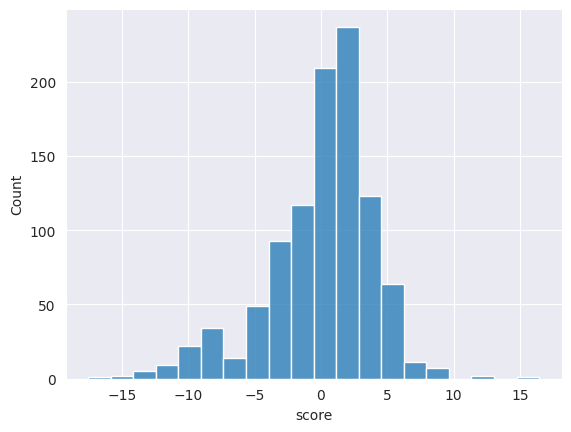

In [137]:
sns.histplot(x='score', data=df_final, bins=20)